In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
X = data.drop('RiskLevel', axis=1)  
y = data['RiskLevel']  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6945812807881774


In [6]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print("Weighted F1 Score:", f1_weighted)
print("Weighted Precision:", precision_weighted)
print("Weighted Recall:", recall_weighted)

Weighted F1 Score: 0.6910861781722852
Weighted Precision: 0.6968034276000671
Weighted Recall: 0.6945812807881774


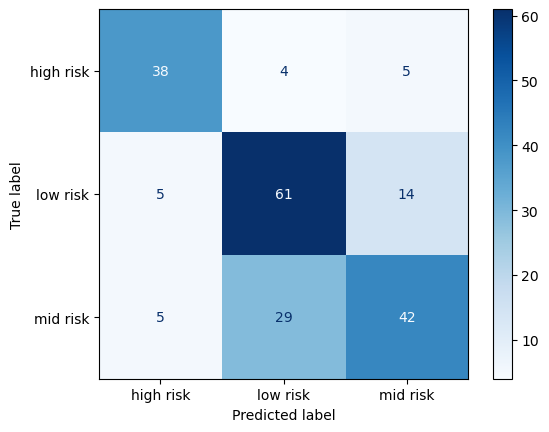

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")